In [1]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy
import math
from datetime import datetime
matplotlib.rc('font',family='AppleGothic')
# 한글 폰트가 깨지는 것을 방지하기 위한 설정 및 라이브러리 선언

In [2]:
# 선처리 된 엑셀 파일 읽어오기
tashu_2013_1 = pd.read_csv('tashu_rental_2013_1.csv')
tashu_2013_2 = pd.read_csv('tashu_rental_2013_2.csv')
tashu_2014_1 = pd.read_csv('tashu_rental_2014_1.csv')
tashu_2014_2 = pd.read_csv('tashu_rental_2014_2.csv')

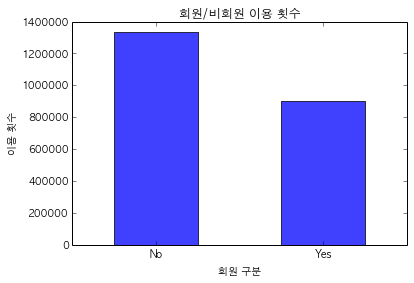

In [8]:
# 회원 비회원 구분
# NO는 비회원
# YES는 회원
# SELECT COUNT(*)
# FROM TASHU_LOG
# GROUP BY IS_MEMBER
member_count =  tashu_2013_1.groupby('IS_MEMBER').size() \
    + tashu_2013_2.groupby('IS_MEMBER').size() \
    + tashu_2014_1.groupby('IS_MEMBER').size() \
    + tashu_2014_2.groupby('IS_MEMBER').size()
    
plot = member_count.plot(kind = 'bar', alpha = 0.75, title = u'회원/비회원 이용 횟수', rot = 0)
plot.set_xlabel(u'회원 구분')
plot.set_ylabel(u'이용 횟수')

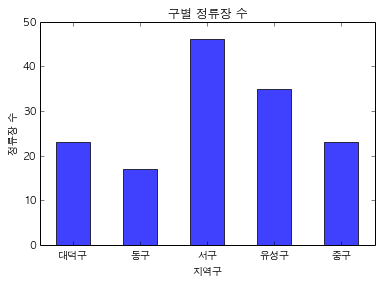

In [4]:
# 지역구별 정류장 수
# SELECT COUNT(*)
# FROM STATION_INFO
# GROUP BY STATION_INFO.구별
station_info = pd.read_csv('201503_station_info.csv', encoding = 'cp949')
station_count = station_info.groupby(u'구별').size()
plot = station_count.plot(kind ='bar',alpha=0.75, title = u'구별 정류장 수',rot=0)
plot.set_ylabel(u'정류장 수')
plot.set_xlabel(u'지역구')

In [25]:
# 인기있는 코스
# SELECT COUNT(*) 
#        FROM TASHU_LOG
#        GROUP BY 
#        TASHU_LOG.RENT_STATION AND RETURN_STATION
#        ORDER BY DESC
popular_course =  tashu_2013_1.groupby(['RENT_STATION', 'RETURN_STATION']).size() \
                    + tashu_2013_2.groupby(['RENT_STATION', 'RETURN_STATION']).size() \
                    + tashu_2014_2.groupby(['RENT_STATION', 'RETURN_STATION']).size() \
                    + tashu_2014_1.groupby(['RENT_STATION', 'RETURN_STATION']).size()
popular_course =  popular_course.sort_values(ascending= False)
for i in popular_course.index[:10]:
    print station_info[station_info[u'번호'] == i[0]][u'명칭'].iloc[0],'to',station_info[station_info[u'번호'] == i[1]][u'명칭'].iloc[0], popular_course[i]

 한밭수목원(정문입구) to  한밭수목원(정문입구) 58581.0
유성구청 to 유성구청 15216.0
 충대정문(장대네거리) to  충대정문(장대네거리) 13177.0
카이스트 학사식당 앞 to 카이스트 서쪽 쪽문 11523.0
무역전시관입구(택시승강장 앞) to 무역전시관입구(택시승강장 앞) 10380.0
 충대정문(장대네거리) to  홈플러스(유성점) 8729.0
월평역 to 월평역 8506.0
 홈플러스(유성점) to  홈플러스(유성점) 8387.0
카이스트 서쪽 쪽문 to 카이스트 학사식당 앞 8252.0
 홈플러스(유성점) to  충대정문(장대네거리) 8130.0


In [5]:
# 인기있는 정류장
# SELECT COUNT(*) 
#        FROM TASHU_LOG
#        GROUP BY 
#        TASHU_LOG.RENT_STATION
#        ORDER BY DESC
top10_station =  tashu_2013_1.groupby('RENT_STATION').size() \
                    + tashu_2013_2.groupby('RENT_STATION').size() \
                    + tashu_2014_2.groupby('RENT_STATION').size() \
                    + tashu_2014_1.groupby('RENT_STATION').size()
top10_station =  top10_station.sort_values(ascending= False)
for i in top10_station.index:
    print station_info[station_info[u'번호'] == i][u'명칭'].iloc[0], top10_station[i]

 한밭수목원(정문입구) 117108.0
 충대정문(장대네거리) 65861.0
유성구청 58090.0
타임월드 앞  57874.0
 홈플러스(유성점) 51328.0
월평역 50083.0
둔산 하이마트 앞 40374.0
카이스트 학사식당 앞 38817.0
 충대정문오거리 1 38383.0
선사유적지주차장 앞 37886.0
카이스트 서쪽 쪽문 36770.0
 유성온천역 3번출구 36563.0
 정부청사 입구(샘머리) 36484.0
무역전시관입구(택시승강장 앞) 34891.0
 경성큰마을 앞 34647.0
 현대아이텔 앞(버스정류장) 34423.0
목원대 32260.0
 정부청사역 앞(4번 출구) 31842.0
 대전시청 앞 31451.0
카이스트 창의학습관 앞 29631.0
초원아파트104동부근(버스정류장) 27964.0
만년동 KBS 부근(기업은행 앞) 27464.0
 대전종합고용지원센터 26897.0
 유성온천역 6번출구 26646.0
 둔산 홈플러스 앞 25661.0
둔산여고 앞 24896.0
만년동주민센터 23025.0
카이스트 다솜관 22790.0
용문4가 22708.0
 청솔아파트앞 22461.0
 둔산대공원 입구(버스정류장) 22430.0
 궁동네거리 22186.0
 삼천중학교 앞 21687.0
정부청사 입구(대덕대로) 21635.0
 도안휴먼시아 10단지 앞 21583.0
카이스트 정문 21388.0
 휴먼시아 6단지 앞 20946.0
 국화아파트앞(501동 앞) 20900.0
 갈마1동 주민센터 앞 19445.0
 한진오피스텔 앞 19357.0
 한국농어촌공사 앞 19214.0
백합4가 앞(농협앞) 18678.0
서부농협본점  18590.0
진달래아파트앞 18441.0
누리아파트앞(후문버스정류장) 17860.0
 유등교 17741.0
대전컨벤션 센터 앞 17471.0
카이스트 세종관 17355.0
갈마역 16939.0
나르메아파트길건너 16719.0
 한가람아파트 앞 16217.0
 남선공원종합체육관 앞 15410.0
 도안휴먼시아 1단지 앞 150

IndexError: single positional indexer is out-of-bounds